# 1. Import Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
import warnings
warnings.filterwarnings("ignore")

# 2. Import Dataset

In [2]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv')
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


# 3.Getting Basic info of Dataset

In [3]:
raw_df.shape

(12032, 12)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [5]:
raw_df.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


# 4. CLeaning the Dataset

# a. Checking and removing duplicate rows

In [6]:
wrong_data = raw_df['Top Dishes'] == 'Top Dishes'
raw_df[wrong_data]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [7]:
wrong_data = raw_df['Address'] == 'Address'
raw_df[wrong_data]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [8]:
wrong_data = raw_df['Name of Restaurant'] == 'Name of Restaurant'
raw_df[wrong_data]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


# b. Removing unwanted columns

In [9]:
raw_df.drop(['Zomato URL', 'Address'], axis = 1, inplace=True)

In [10]:
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


# C. Cleaning the Null Records

In [99]:
raw_df.isnull() 

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category,Dining Rating Type,Delivery Rating Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11666,False,False,False,False,False,False,False,False,False,False,False,False,False
11667,False,False,False,False,False,False,False,False,False,False,False,False,False
11736,False,False,False,False,False,False,False,False,False,False,False,False,False
11785,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
raw_df.isnull().sum()

Name of Restaurant          0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [13]:
raw_df[raw_df['Delivery Rating Count'].isnull()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
1603,Erode Amman Mess,Thiruvanmiyur,"['Chettinad', ' South Indian', ' Kerala', ' Ch...",Invalid,600.0,NaN,NaN,NaN,NaN,"['Home Delivery', 'Indoor Seating', 'Table boo..."
2159,The Ultimate Brownie And Chocolate Place,Sholinganallur,"['Bakery', ' Desserts']",Invalid,350.0,NaN,NaN,NaN,NaN,"['Delivery Only', 'Desserts and Bakes']"
2419,Amudha Aunty's kitchen,Sholinganallur,"['Tamil', ' South Indian']",Invalid,250.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
2537,TN 03 CAFE,Tiruvottiyur,"['Sandwich', ' Fast Food', ' Ice Cream', ' Bev...",Invalid,200.0,NaN,NaN,NaN,NaN,['Delivery Only']
2542,Maggi Point,Tambaram,"['Fast Food', ' Street Food', ' Beverages']",['Masala Maggi'],500.0,NaN,NaN,NaN,NaN,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [14]:
raw_df[raw_df['Delivery Rating'].isnull()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
15,Welcome Hotel,Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300.0,4.5,1094,NaN,Does not offer Delivery,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
18,Wire Room Bar & Kitchen,"Phoenix Market City, Velachery","['Continental', ' Asian']","['Cocktails', ' Salad', ' Beer', ' Tikka', ' P...",2000.0,4.1,354,NaN,Does not offer Delivery,"['Full Bar Available', 'Mall Parking', 'Dance ..."
23,BFF 2.0,RA Puram,"['North Indian', ' Continental', ' Italian']","['Crispy Chicken', ' Cocktails', ' Pizza', ' N...",1500.0,4.2,464,NaN,Does not offer Delivery,"['Full Bar Available', 'Indoor Seating', 'Nigh..."
85,Bazaar - All Day Diner - Grand by GRT Hotels,Grand by GRT Hotels,"['North Indian', ' South Indian', ' Continenta...","['Pizza', ' Pasta', ' Fish', ' Chaat', ' Momos...",2500.0,4.4,1198,NaN,Not enough Delivery Reviews,"['Breakfast', 'Home Delivery', 'Serves Alcohol..."
89,Coal Barbecues,Velachery,"['North Indian', ' Chinese']","['Chicken Honey', ' Fish', ' Prawn', ' Waffles...",1400.0,4.4,9410,NaN,Does not offer Delivery,"['Indoor Seating', 'Buffet', 'Table reservatio..."
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [15]:
raw_df[raw_df['Dining Rating'].isnull()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,NaN,Does not offer Dining,4.3,1061,['Home Delivery']
77,Al Dhareeq Beef Biriyani,Kodambakkam,['Biryani'],['Beef Biryani'],300.0,NaN,Does not offer Dining,3.9,19600,['Home Delivery']
106,Twilight Take Out,Nungambakkam,"['North Indian', ' Chinese', ' Rolls', ' Conti...","['Club Sandwich', ' Chicken Tikka Roll', ' Chi...",350.0,NaN,Does not offer Dining,4.0,11200,"['Home Delivery', 'Free Parking']"
107,The Red Box,Anna Nagar West,['Chinese'],"['Noodle', ' Chilli Chicken Gravy', ' Dragon C...",200.0,NaN,Does not offer Dining,4.2,11500,['Home Delivery']
114,Charminar Biriyani Centre,Royapettah,"['Biryani', ' North Indian']","['Chicken Biryani', ' Bread Halwa', ' Brinjal ...",300.0,NaN,Does not offer Dining,3.9,652,"['Home Delivery', 'Standing Tables']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [16]:
raw_df[raw_df['Dining Rating Count'].isnull()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
1603,Erode Amman Mess,Thiruvanmiyur,"['Chettinad', ' South Indian', ' Kerala', ' Ch...",Invalid,600.0,NaN,NaN,NaN,NaN,"['Home Delivery', 'Indoor Seating', 'Table boo..."
2159,The Ultimate Brownie And Chocolate Place,Sholinganallur,"['Bakery', ' Desserts']",Invalid,350.0,NaN,NaN,NaN,NaN,"['Delivery Only', 'Desserts and Bakes']"
2419,Amudha Aunty's kitchen,Sholinganallur,"['Tamil', ' South Indian']",Invalid,250.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
2537,TN 03 CAFE,Tiruvottiyur,"['Sandwich', ' Fast Food', ' Ice Cream', ' Bev...",Invalid,200.0,NaN,NaN,NaN,NaN,['Delivery Only']
2542,Maggi Point,Tambaram,"['Fast Food', ' Street Food', ' Beverages']",['Masala Maggi'],500.0,NaN,NaN,NaN,NaN,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


In [17]:
raw_df.fillna('NA', inplace=True)

In [18]:
raw_df.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [19]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  object 
 6   Dining Rating Count    12032 non-null  object 
 7   Delivery Rating        12032 non-null  object 
 8   Delivery Rating Count  12032 non-null  object 
 9   Features               12032 non-null  object 
dtypes: float64(1), object(9)
memory usage: 940.1+ KB


In [20]:
raw_df['Dining Rating'].value_counts()

Dining Rating
NA     5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

# d. Replacing null values with 0

In [21]:
raw_df['Dining Rating'].replace(to_replace=['NA'], value='0', inplace=True)
raw_df['Dining Rating'].value_counts()

Dining Rating
0      5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [22]:
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
1893                            1
742                             1
1363                            1
1094                            1
1266                            1
Name: count, Length: 794, dtype: int64

In [23]:
raw_df['Dining Rating Count'].replace(to_replace=['NA','Does not offer Dining','Not enough Dining Reviews'], value='0', inplace=True)
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
0       5371
4        339
5        271
6        248
8        180
        ... 
446        1
318        1
1893       1
2244       1
5821       1
Name: count, Length: 791, dtype: int64

In [24]:
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
NA                              220
27                               34
22                               30
                               ... 
39600                             1
21700                             1
4320                              1
24700                             1
10500                             1
Name: count, Length: 2282, dtype: int64

In [25]:
raw_df['Delivery Rating Count'].replace(to_replace=['NA','Does not offer Delivery','Not enough Delivery Reviews'], value='0', inplace=True)
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
0        5870
27         34
22         30
60         30
37         30
         ... 
282         1
885         1
757         1
1789        1
24700       1
Name: count, Length: 2279, dtype: int64

In [26]:
raw_df['Delivery Rating'].value_counts()

Delivery Rating
NA     5851
3.9    1383
3.8     701
4.0     570
3.7     559
4.1     468
3.6     465
4.2     401
3.5     314
4.3     277
3.4     259
3.3     189
4.4     128
3.2      93
3.1      79
3.0      63
4.5      55
2.9      39
2.8      26
4.6      24
2.7      19
2.6      17
2.5       9
0.3       8
2.4       7
1.8       5
2.3       5
2.0       5
2.2       5
4.7       4
2.1       2
1.6       1
1.5       1
Name: count, dtype: int64

In [100]:
raw_df['Delivery Rating'].replace(to_replace=['NA','Does not offer Delivery','Not enough Delivery Reviews'], value='0', inplace=True)
raw_df['Delivery Rating'].value_counts()

Delivery Rating
3.9    939
3.8    530
4.0    437
3.7    411
4.1    356
3.6    329
4.2    302
3.5    220
4.3    219
3.4    169
3.3    117
4.4     98
3.2     57
4.5     43
3.1     42
3.0     31
2.9     17
4.6     16
2.8      8
2.6      6
2.7      4
2.4      3
4.7      3
2.2      2
2.3      1
2.1      1
Name: count, dtype: int64

# E.Converting numerical values to numerical data types

In [29]:
raw_df['Dining Rating'] = raw_df['Dining Rating'].astype('float64')
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].astype('int64')
raw_df['Delivery Rating'] = raw_df['Delivery Rating'].astype('float64')
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].astype('int64')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  float64
 6   Dining Rating Count    12032 non-null  int64  
 7   Delivery Rating        12032 non-null  float64
 8   Delivery Rating Count  12032 non-null  int64  
 9   Features               12032 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 940.1+ KB


# f. Removing special charatcters

In [30]:
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(r'\[', '', regex=True)
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(r'\]', '', regex=True)
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,'Biryani',"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [31]:
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace(r'[\[\]]', '', regex=True)
raw_df['Features'] = raw_df['Features'].str.replace(r'[\[\]]', '', regex=True)
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryani...",500.0,4.3,1500,4.3,9306,"'Home Delivery', 'Indoor Seating'"
1,Sukkubhai Biriyani,Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Dess...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...",1000.0,4.4,3059,4.1,39200,"'Home Delivery', 'Free Parking', 'Table bookin..."
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Arab...","'Brinjal Curry', ' Tandoori Chicken', ' Chicke...",500.0,4.3,1361,4.4,10500,"'Home Delivery', 'Indoor Seating'"
3,KFC,Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Beve...",'Zinger Burger',500.0,4.0,1101,4.0,11200,"'Home Delivery', 'Free Parking', 'Card Upon De..."
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Chet...","'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...",450.0,4.2,617,4.1,22400,"'Home Delivery', 'Indoor Seating'"


In [32]:
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(r'\'', '', regex=True)
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace(r'\'', '', regex=True)
raw_df['Features'] = raw_df['Features'].str.replace(r'\'', '', regex=True)
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,9306,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,10500,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,22400,"Home Delivery, Indoor Seating"


# g. Converting Price for 2 column to Price 

In [33]:
raw_df['Price'] = raw_df['Price for 2'] /2
raw_df.drop(columns=['Price for 2'], inplace=True)
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",4.3,1500,4.3,9306,"Home Delivery, Indoor Seating",250.0
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec...",500.0
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",4.3,1361,4.4,10500,"Home Delivery, Indoor Seating",250.0
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver...",250.0
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",4.2,617,4.1,22400,"Home Delivery, Indoor Seating",225.0


# h. Creating new column cuisine_category from cuisine column

In [34]:
# Define a function to categorize based on presence of keywords
def categorize_cuisine(cuisines):
    cuisine_lower = cuisines.lower()  # Convert to lowercase for consistent matching
    if any(c in cuisine_lower for c in ['italian', 'french', 'continental']):
        return 'European'
    elif any(c in cuisine_lower for c in ['chinese', 'thai', 'japanese', 'malaysian']):
        return 'Asian'
    elif any(c in cuisine_lower for c in ['indian', 'biryani']):
        return 'Indian'
    elif any(c in cuisine_lower for c in ['mexican']):
        return 'Latin American'
    elif any(c in cuisine_lower for c in ['tibetan', 'momos']):
        return 'Tibetan'
    elif any(c in cuisine_lower for c in ['turkish', 'kebab']):
        return 'Middle Eastern'
    elif any(c in cuisine_lower for c in ['wraps']):
        return 'Fast Food'
    else:
        return 'Other'

# Apply the function to the 'Cuisine' column to create the 'cuisine_category' column
raw_df['cuisine_category'] = raw_df['Cuisine'].apply(categorize_cuisine)

# Display the first few rows
raw_df.head()


,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",4.3,1500,4.3,9306,"Home Delivery, Indoor Seating",250.0,Indian
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec...",500.0,Indian
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",4.3,1361,4.4,10500,"Home Delivery, Indoor Seating",250.0,Asian
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver...",250.0,Other
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",4.2,617,4.1,22400,"Home Delivery, Indoor Seating",225.0,Asian


In [35]:
raw_df.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
Price                    0
cuisine_category         0
dtype: int64

# i. Removing the restaurant records whose Rating or Votes is 0

In [36]:
# Finding those restaurant whose has 0 Rating or Votes
useless_data = (raw_df['Dining Rating'] == 0.0) | (raw_df['Dining Rating Count'] == 0)|(raw_df['Delivery Rating'] == 0.0)|(raw_df['Delivery Rating Count'] == 0)
raw_df[useless_data]

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category
6,Bai Veetu Kalyanam,Navallur,Biryani,"Bread Halwa, Mutton Biryani, Brinjal Gravy, ...",0.0,0,4.3,1061,Home Delivery,175.0,Indian
15,Welcome Hotel,Purasavakkam,"South Indian, Desserts, Beverages","Pongal, Podi Dosa, Idli Sambar, Vada Curry,...",4.5,1094,0.0,0,"Breakfast, Vegetarian Only, Indoor Seating",150.0,Indian
18,Wire Room Bar & Kitchen,"Phoenix Market City, Velachery","Continental, Asian","Cocktails, Salad, Beer, Tikka, Pork Ribs, ...",4.1,354,0.0,0,"Full Bar Available, Mall Parking, Dance Floor,...",1000.0,European
23,BFF 2.0,RA Puram,"North Indian, Continental, Italian","Crispy Chicken, Cocktails, Pizza, Nachos, ...",4.2,464,0.0,0,"Full Bar Available, Indoor Seating, Nightlife,...",750.0,European
77,Al Dhareeq Beef Biriyani,Kodambakkam,Biryani,Beef Biryani,0.0,0,3.9,19600,Home Delivery,150.0,Indian
...,...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,Sandwich,Invalid,0.0,0,0.0,0,"Breakfast, Delivery Only",175.0,Other
12028,CK's Sandwiches,Kolathur,Sandwich,Invalid,0.0,0,0.0,0,"Breakfast, Delivery Only",175.0,Other
12029,CK's Sandwiches,Anna Nagar East,Sandwich,Invalid,0.0,0,0.0,0,"Breakfast, Delivery Only",175.0,Other
12030,CK's Sandwiches,Ramapuram,Sandwich,Invalid,0.0,0,0.0,0,"Breakfast, Delivery Only",175.0,Other


In [37]:
raw_df = raw_df[~useless_data]
raw_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",4.3,1500,4.3,9306,"Home Delivery, Indoor Seating",250.0,Indian
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec...",500.0,Indian
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",4.3,1361,4.4,10500,"Home Delivery, Indoor Seating",250.0,Asian
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver...",250.0,Other
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",4.2,617,4.1,22400,"Home Delivery, Indoor Seating",225.0,Asian
...,...,...,...,...,...,...,...,...,...,...,...
11666,Juice World,Alandur,"Beverages, Fast Food",Invalid,2.0,4,3.9,42,"Home Delivery, Vegetarian Only, Indoor Seating",150.0,Other
11667,Juice World,Palavakkam,"Beverages, Fast Food",Invalid,2.0,4,3.9,48,"Home Delivery, Vegetarian Only, Indoor Seating",150.0,Other
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,"South Indian, Sandwich, Chinese, Street Food",Invalid,3.2,6,3.9,48,"Home Delivery, Indoor Seating",100.0,Asian
11785,Engineers Kitchen,Ambattur,"North Indian, Chinese, Andhra",Invalid,2.5,6,3.5,214,"Home Delivery, Indoor Seating",200.0,Asian


# j. Removing unwanted letters and characters from location details

In [38]:
raw_df['Location'].value_counts()

Location
Porur                                                       148
Anna Nagar East                                             145
Velachery                                                   145
Ambattur                                                    123
T. Nagar                                                    119
                                                           ... 
Muttukadu                                                     1
Eat And Pack, Ambattur                                        1
RMZ Millenia Business Park, Old Mahabalipuram Road (OMR)      1
RK Salai (Cathedral Road)                                     1
Spectrum The Grand Venus Mall, Perambur                       1
Name: count, Length: 161, dtype: int64

In [40]:
raw_df['Location'] = raw_df['Location'].str.replace('[a-zA-Z].+, ','',regex=True)
raw_df['Location'].value_counts()

Location
Velachery                    172
Porur                        149
Anna Nagar East              145
Ambattur                     141
T. Nagar                     121
                            ... 
Old Mahabalipuram Road         1
Ambattur                       1
Muttukadu                      1
Mahabalipuram                  1
RK Salai (Cathedral Road)      1
Name: count, Length: 117, dtype: int64

In [41]:
raw_df['Location'] = raw_df['Location'].str.replace(' West| west| East| east','',regex=True)
raw_df['Location'].value_counts()

Location
Anna Nagar                   252
Velachery                    172
Porur                        149
Ambattur                     141
T. Nagar                     121
                            ... 
Old Mahabalipuram Road         1
Ambattur                       1
Muttukadu                      1
Mahabalipuram                  1
RK Salai (Cathedral Road)      1
Name: count, Length: 115, dtype: int64

In [42]:
raw_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",4.3,1500,4.3,9306,"Home Delivery, Indoor Seating",250.0,Indian
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec...",500.0,Indian
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",4.3,1361,4.4,10500,"Home Delivery, Indoor Seating",250.0,Asian
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver...",250.0,Other
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",4.2,617,4.1,22400,"Home Delivery, Indoor Seating",225.0,Asian
...,...,...,...,...,...,...,...,...,...,...,...
11666,Juice World,Alandur,"Beverages, Fast Food",Invalid,2.0,4,3.9,42,"Home Delivery, Vegetarian Only, Indoor Seating",150.0,Other
11667,Juice World,Palavakkam,"Beverages, Fast Food",Invalid,2.0,4,3.9,48,"Home Delivery, Vegetarian Only, Indoor Seating",150.0,Other
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,"South Indian, Sandwich, Chinese, Street Food",Invalid,3.2,6,3.9,48,"Home Delivery, Indoor Seating",100.0,Asian
11785,Engineers Kitchen,Ambattur,"North Indian, Chinese, Andhra",Invalid,2.5,6,3.5,214,"Home Delivery, Indoor Seating",200.0,Asian


# k. Creating Dining rating type and delivery rating type coulmn 

In [43]:
bins = [1, 2, 3, 4, 5,6]
labels = ['Poor', 'Average', 'Good','Very Good', 'Excellent']

# Create a new column 'rating_type'
raw_df['Dining Rating Type'] = pd.cut(raw_df['Dining Rating'], bins=bins, labels=labels, include_lowest=True)
raw_df['Delivery Rating Type'] = pd.cut(raw_df['Delivery Rating'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows
raw_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category,Dining Rating Type,Delivery Rating Type
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",4.3,1500,4.3,9306,"Home Delivery, Indoor Seating",250.0,Indian,Very Good,Very Good
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec...",500.0,Indian,Very Good,Very Good
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",4.3,1361,4.4,10500,"Home Delivery, Indoor Seating",250.0,Asian,Very Good,Very Good
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver...",250.0,Other,Good,Good
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",4.2,617,4.1,22400,"Home Delivery, Indoor Seating",225.0,Asian,Very Good,Very Good


In [44]:
raw_df[raw_df.duplicated()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category,Dining Rating Type,Delivery Rating Type


# l. Creating zomata dataframe

In [45]:
zomato_df = raw_df.copy()
zomato_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category,Dining Rating Type,Delivery Rating Type
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",4.3,1500,4.3,9306,"Home Delivery, Indoor Seating",250.0,Indian,Very Good,Very Good
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec...",500.0,Indian,Very Good,Very Good
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",4.3,1361,4.4,10500,"Home Delivery, Indoor Seating",250.0,Asian,Very Good,Very Good
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,4.0,1101,4.0,11200,"Home Delivery, Free Parking, Card Upon Deliver...",250.0,Other,Good,Good
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",4.2,617,4.1,22400,"Home Delivery, Indoor Seating",225.0,Asian,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11666,Juice World,Alandur,"Beverages, Fast Food",Invalid,2.0,4,3.9,42,"Home Delivery, Vegetarian Only, Indoor Seating",150.0,Other,Poor,Good
11667,Juice World,Palavakkam,"Beverages, Fast Food",Invalid,2.0,4,3.9,48,"Home Delivery, Vegetarian Only, Indoor Seating",150.0,Other,Poor,Good
11736,Adyar Vaishnavas Thattu Idly Kadai,Porur,"South Indian, Sandwich, Chinese, Street Food",Invalid,3.2,6,3.9,48,"Home Delivery, Indoor Seating",100.0,Asian,Good,Good
11785,Engineers Kitchen,Ambattur,"North Indian, Chinese, Andhra",Invalid,2.5,6,3.5,214,"Home Delivery, Indoor Seating",200.0,Asian,Average,Good


# 4. Performing Exploratory Data Analysis

# Q1) How many restaurants are in Chennai for each type of cuisine?

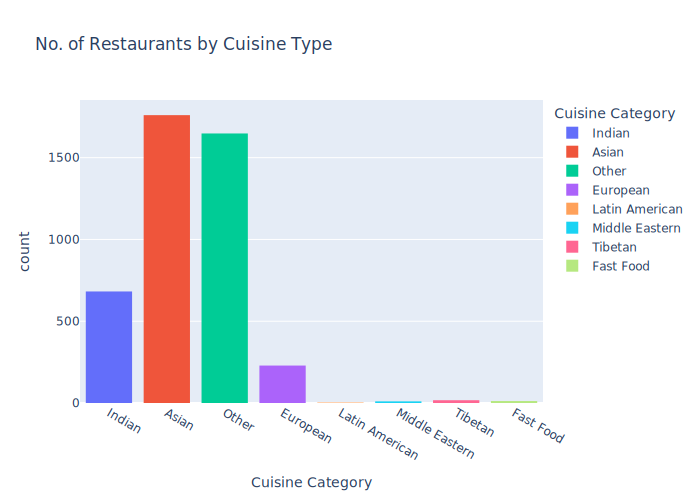

In [46]:
fig = px.histogram(zomato_df, x='cuisine_category', color='cuisine_category',
                       title='No. of Restaurants by Cuisine Type',
                       labels={'cuisine_category': 'Cuisine Category'})
fig.show()

# Q2) What are the percentage of restaurants by Delivery Rating Type in Chennai?

In [47]:
Delivery_rating_type_df = zomato_df['Delivery Rating Type'].value_counts().reset_index()
#rating_type_df.rename(columns={'index':'RATING TYPE', 'RATING_TYPE':'COUNT OF RESTAURANTS'}, inplace=True)
Delivery_rating_type_df

,Delivery Rating Type,count
0,Good,3251
1,Very Good,1037
2,Average,73
3,Poor,0
4,Excellent,0


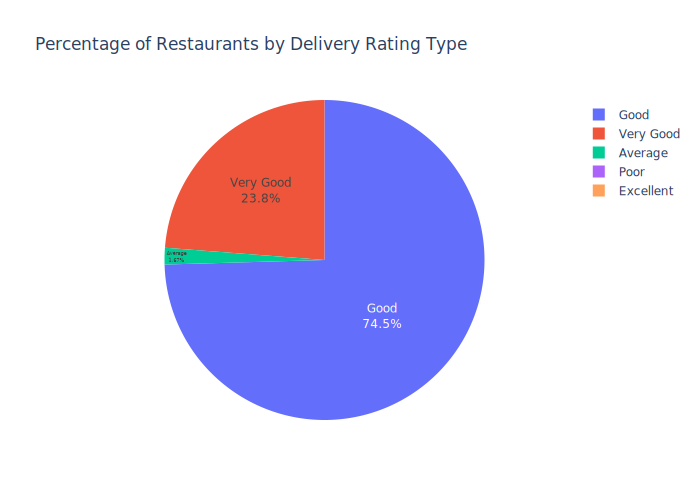

In [49]:
fig = px.pie(Delivery_rating_type_df, names='Delivery Rating Type', values='count', color='Delivery Rating Type',
        title='Percentage of Restaurants by Delivery Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Q3) Which are the Top 10 highest Delivery rated Biryani Restaurant in Chennai?

In [104]:
Biryani_df = zomato_df[zomato_df['Cuisine'].str.contains('Biryani')]
Biryani_df.sort_values(by='Delivery Rating',ascending=False).head(10)

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category,Dining Rating Type,Delivery Rating Type
1985,Arabian Plate,Adambakkam,"Arabian, Biryani",Invalid,3.7,58,4.7,491,"Home Delivery, Indoor Seating",150.0,Indian,Good,Very Good
8779,SS Hyderabad Biryani,Tiruvottiyur,"Biryani, North Indian, Chinese, Arabian",Invalid,3.9,267,4.5,2307,"Home Delivery, Catering Available, Indoor Seating",250.0,Asian,Good,Very Good
1780,Rizwan,Triplicane,"North Indian, Chinese, Biryani",Invalid,3.7,76,4.4,614,"Home Delivery, Indoor Seating",200.0,Asian,Good,Very Good
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",4.3,1361,4.4,10500,"Home Delivery, Indoor Seating",250.0,Asian,Very Good,Very Good
8776,SS Hyderabad Biryani,Perambur,"Biryani, North Indian, Chinese, Arabian","Chicken Biryani, Shawarma, Bread Halwa",4.1,445,4.4,11,"Home Delivery, Serves Halal, Indoor Seating, T...",250.0,Asian,Very Good,Very Good
8775,SS Hyderabad Biryani,Avadi,"Biryani, North Indian, Chinese, Arabian","Chicken Biryani, Fried Rice",4.2,381,4.4,1529,"Home Delivery, Indoor Seating, Catering Available",250.0,Asian,Very Good,Very Good
8882,Dindigul Thalappakatti,Besant Nagar,"South Indian, Biryani, Chinese, North Indian","Mutton Biryani, Paratha, Chicken Grill, Pan...",4.1,907,4.4,5619,"Home Delivery, Indoor Seating, Table reservati...",450.0,Asian,Very Good,Very Good
8781,SS Hyderabad Biryani,Washermenpet,"Biryani, North Indian, Chinese, Arabian",Invalid,4.0,179,4.4,2727,"Home Delivery, Serves Halal, Indoor Seating",250.0,Asian,Good,Very Good
8778,SS Hyderabad Biryani,Royapettah,"Biryani, North Indian, Chinese, Arabian","Bucket Biryani, Chicken 65, Tandoori Chicken...",4.1,364,4.4,3308,"Home Delivery, Indoor Seating",250.0,Asian,Very Good,Very Good
2812,Best Biriyani,Mylapore,"Biryani, Chinese, North Indian, South Indian",Invalid,3.1,27,4.3,377,"Home Delivery, Indoor Seating",225.0,Asian,Good,Very Good


# Q4) Which is the best Food Truck in Chennai?

In [57]:
foodtruck_df = zomato_df[zomato_df['cuisine_category'] == 'Indian']
foodtruck_df.sort_values(by='Delivery Rating',ascending=False).head(2)

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category,Dining Rating Type,Delivery Rating Type
1985,Arabian Plate,Adambakkam,"Arabian, Biryani",Invalid,3.7,58,4.7,491,"Home Delivery, Indoor Seating",150.0,Indian,Good,Very Good
4742,Cococane,Guduvancheri,South Indian,Invalid,3.8,11,4.6,319,"Home Delivery, Indoor Seating",300.0,Indian,Good,Very Good


# Q5) Which places have the highest Delivery rated restaurant for each Cuisine Type in Chennai?

In [58]:
# Assuming restaurants having rating above 4.5
highest_rated_df = zomato_df[zomato_df['Delivery Rating'] >= 4.5]
highest_rated_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category,Dining Rating Type,Delivery Rating Type
62,Amadora Gourmet Ice Cream & Sorbet,Nungambakkam,"Desserts, Ice Cream","Sandwich, Gelato, Chocolate Icecreams, Wate...",4.8,1516,4.5,361,"Home Delivery, Outdoor Seating, Desserts and B...",250.0,Other,Very Good,Very Good
78,Shri Rajasthani Dhaba,Anna Nagar,"Rajasthani, North Indian","Rajasthani Thali, Buttermilk, Roti, Paratha...",4.5,983,4.5,5537,"Home Delivery, Vegetarian Only, Indoor Seating...",250.0,Indian,Very Good,Very Good
92,Fruit Shop On Greams Road,Thousand Lights,"Beverages, Fast Food, Healthy Food, Juices","Fruit Juices, Sandwich, Mint Lime Cooler, T...",4.5,609,4.6,1699,"Home Delivery, Vegetarian Only, Indoor Seating...",175.0,Other,Very Good,Very Good
163,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,"Momos, Chinese","Momos, Noodle, Chowmein, Fried Momo, Chop ...",4.8,1658,4.5,2825,"Home Delivery, Free Parking, Indoor Seating",175.0,Asian,Very Good,Very Good
164,La Chocolate,Egmore,"Bakery, Desserts, Italian, Continental, Be...","Brownie, Red Velvet, Photo Cake, Choco Truf...",4.0,256,4.5,1574,"Home Delivery, Vegetarian Only, Free Parking, ...",400.0,European,Good,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10358,CK's Bakery,Ekkaduthangal,"Bakery, Desserts, Fast Food, Sandwich",Invalid,3.2,9,4.6,86,"Home Delivery, Indoor Seating, Desserts and Bakes",175.0,Other,Good,Very Good
10525,Cake Waves,Arumbakkam,"Bakery, Fast Food",Invalid,3.1,17,4.6,67,"Home Delivery, Indoor Seating, Desserts and Bakes",250.0,Other,Good,Very Good
10673,Sri Krishna Sweets,Thiruvanmiyur,"Mithai, Street Food",Invalid,2.8,45,4.5,90,"Breakfast, Home Delivery, Vegetarian Only, Ind...",125.0,Asian,Average,Very Good
11043,Kulfi Treat,T. Nagar,"Desserts, Ice Cream, Beverages",Invalid,3.8,54,4.5,316,"Home Delivery, Vegetarian Only, Indoor Seating...",50.0,Other,Good,Very Good


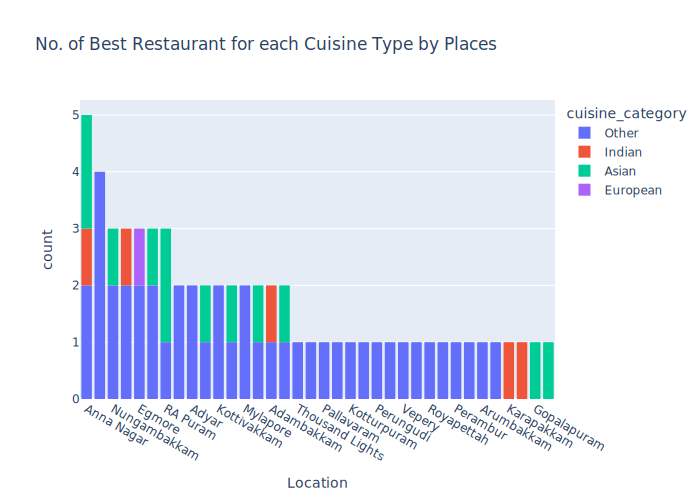

In [60]:
fig = px.histogram(highest_rated_df, x='Location', color='cuisine_category',
 title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
fig.show()

# Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Chennai?

In [61]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'cuisine_category'])['Price'].mean().reset_index()
highest_rated_price_df.head()

,Location,cuisine_category,Price
0,Adambakkam,Indian,150.0
1,Adambakkam,Other,100.0
2,Adyar,Other,162.5
3,Alwarpet,Other,250.0
4,Anna Nagar,Asian,225.0


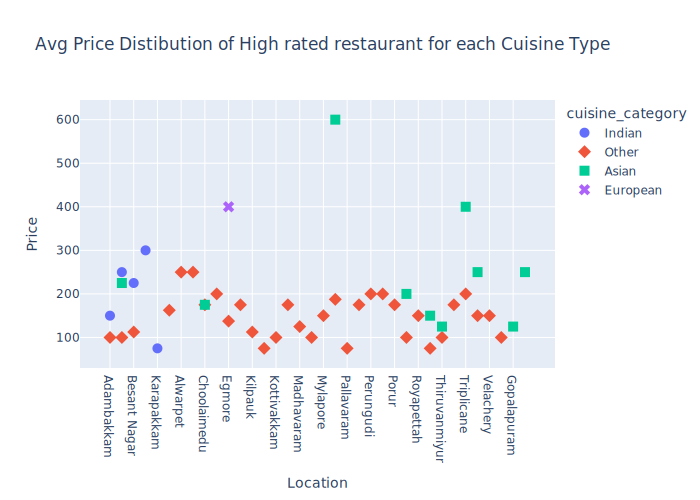

In [63]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price", color="cuisine_category", symbol="cuisine_category",
 title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

# Q7) Which areas have a large number of Indian Restaurant Market?

In [65]:
chinese_df = zomato_df[zomato_df['cuisine_category'].str.contains('Indian')]
chinese_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Price,cuisine_category,Dining Rating Type,Delivery Rating Type
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",4.3,1500,4.3,9306,"Home Delivery, Indoor Seating",250.0,Indian,Very Good,Very Good
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",4.4,3059,4.1,39200,"Home Delivery, Free Parking, Table booking rec...",500.0,Indian,Very Good,Very Good
11,Kovai Alankar Vilas,Anna Nagar,South Indian,"Elaneer Payasam, Paratha, Mutton Chukka, Mu...",4.4,961,3.6,7591,"Home Delivery, Free Parking, Indoor Seating, T...",350.0,Indian,Very Good,Good
20,Velidis,Ramapuram,"Andhra, Biryani, North Indian","Chicken Guntur, Hyderabadi Biryani, Guntur P...",4.2,802,4.1,10600,"Home Delivery, Free Parking, Indoor Seating",250.0,Indian,Very Good,Very Good
24,Eating Circles,Alwarpet,South Indian,"Rose Milk, Neer Dosa, Thatte Idli, Open Mas...",4.7,782,4.2,2744,"Breakfast, Home Delivery, Vegetarian Only, Ind...",125.0,Indian,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11323,Lassi Corner,Ramapuram,"Beverages, North Indian, Fast Food, Ice Cream",Invalid,3.3,12,2.9,114,"Home Delivery, Indoor Seating",125.0,Indian,Good,Average
11330,Dwaraka,Valasaravakkam,"South Indian, Street Food, Desserts",Invalid,2.0,4,4.1,113,"Home Delivery, Vegetarian Only, Indoor Seating",150.0,Indian,Poor,Very Good
11456,SKB,Vadapalani,South Indian,Invalid,3.3,15,3.9,39,"Breakfast, Home Delivery, Indoor Seating",250.0,Indian,Good,Good
11458,Sri Krishna Bhavan,Velachery,South Indian,Invalid,2.7,13,3.9,20,"Breakfast, Home Delivery, Vegetarian Only, Ind...",200.0,Indian,Average,Good


In [66]:
# Aggregating and renaming columns
chinese_rest_df = chinese_df.groupby(by='Location').agg({'Name of Restaurant': 'count', 'Price': 'mean'}).rename(columns={'Name of Restaurant': 'COUNT OF RESTAURANTS', 'PRICE': 'AVERAGE PRICE'})

# Sorting by 'COUNT OF RESTAURANTS' and selecting the top 25
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)

# Display the top 25 rows
print(chinese_rest_df.head())

            COUNT OF RESTAURANTS       Price
Location                                    
Velachery                     31  214.516129
Ambattur                      26  185.576923
Perungudi                     25  193.000000
Porur                         25  197.000000
Anna Nagar                    23  228.260870


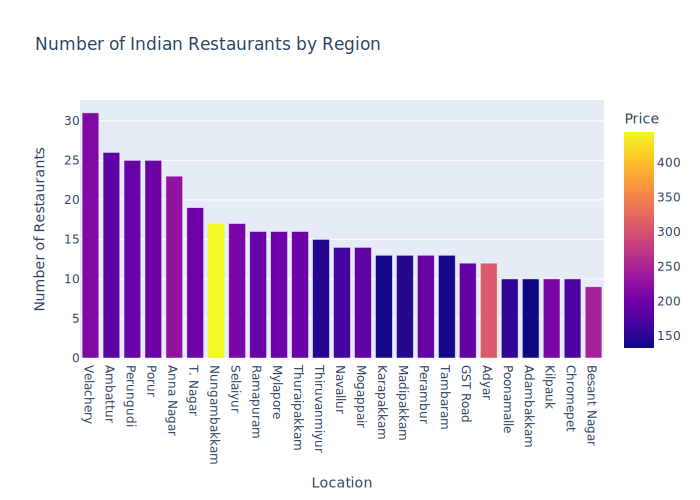

In [67]:
import pandas as pd
import plotly.express as px

# Assuming you have this DataFrame
# chinese_rest_df = ...

# Reset index if 'REGION' is currently the index
chinese_rest_df = chinese_rest_df.reset_index()

# Create the bar chart
fig = px.bar(
    chinese_rest_df,
    x='Location',
    y='COUNT OF RESTAURANTS',
    color='Price',
    title='Number of Indian Restaurants by Region',
    labels={'COUNT OF RESTAURANTS': 'Number of Restaurants', 'AVERAGE PRICE': 'Average Price'},
    color_continuous_scale=px.colors.sequential.Plasma
)

# Show the figure
fig.show()

# Q8) Is there a relation between Price and Rating by each Cuisine Type?

In [69]:
price_rating_df = zomato_df.groupby(['cuisine_category', 'Delivery Rating'])['Price'].mean().reset_index()
price_rating_df

,cuisine_category,Delivery Rating,Price
0,Asian,2.1,200.00
1,Asian,2.2,300.00
2,Asian,2.4,125.00
3,Asian,2.6,225.00
4,Asian,2.8,231.25
...,...,...,...
111,Tibetan,3.9,162.50
112,Tibetan,4.0,100.00
113,Tibetan,4.1,125.00
114,Tibetan,4.2,200.00


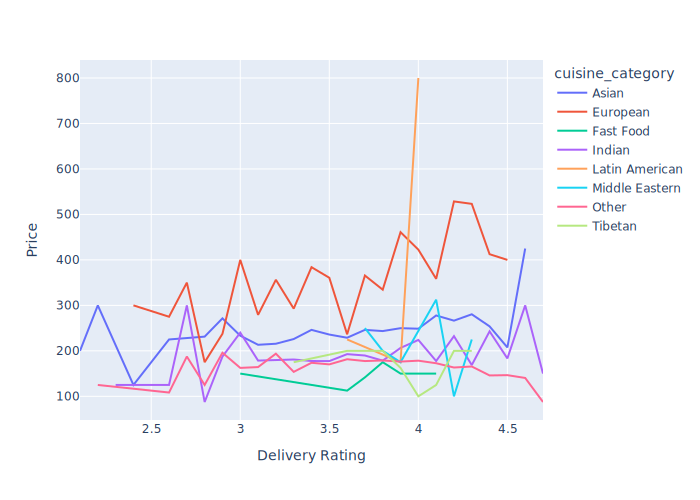

In [70]:
fig = px.line(price_rating_df, y="Price", x="Delivery Rating",color='cuisine_category')
fig.show()

# Q9) Is there a relation between Region and Price?

In [71]:
region_price_df = zomato_df.groupby(['Location'])['Price'].mean().reset_index()
region_price_df

,Location,Price
0,Abhiramapuram,100.000000
1,Adambakkam,163.815789
2,Adyar,264.285714
3,Akkarai,287.500000
4,Alandur,221.428571
...,...,...
110,Vepery,175.000000
111,Vettuvankeni,237.500000
112,Virugambakkam,212.500000
113,Washermenpet,190.277778


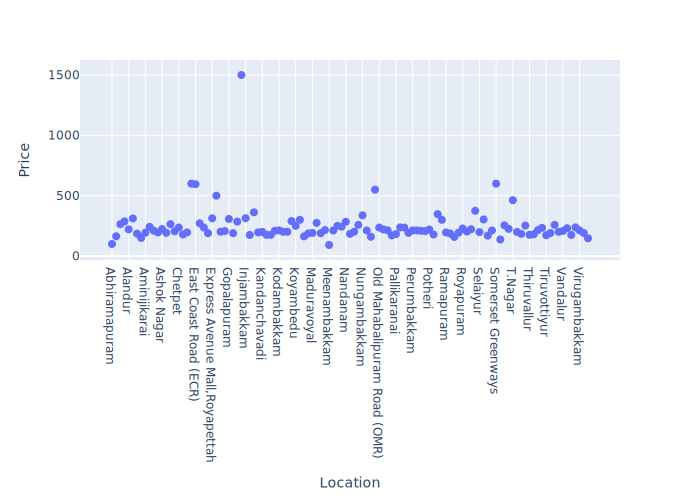

In [72]:
fig = px.scatter(region_price_df, x="Location", y="Price").update_traces(marker_size=8)
fig.show()

# Q10) Find the list of Affordable Restaurants?
The criteria for Affordable Restaurants would be:-

1. Low Price 2) High Rated First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe. 
Let me explain:-The most expensive restaurant has an average meal cost= 6000. 
We'll try to stay economical and only pick the restaurants that are 1/4th of 6000.

In [73]:
max_price = zomato_df['Price'].max()
one_fourth_price = max_price/4
print ('One Fourth Price is:',one_fourth_price)

One Fourth Price is: 375.0


In [74]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
aff_rest_df = zomato_df[['Name of Restaurant', 'Price', 'Cuisine', 'Location', 'cuisine_category']]
aff_rest_df = aff_rest_df[aff_rest_df['Price'] <= 1250]
aff_rest_df.sort_values(by='Price', inplace=True)
aff_rest_df

,Name of Restaurant,Price,Cuisine,Location,cuisine_category
2921,Cheta Butter Milk,50.0,Beverages,Thousand Lights,Other
108,Rayar's Mess,50.0,South Indian,Mylapore,Indian
3624,Hotel Mahalakshmi,50.0,South Indian,Ramapuram,Indian
754,90ML,50.0,"Tea, Coffee",Nungambakkam,Other
2151,Cane 4 U,50.0,Beverages,Besant Nagar,Other
...,...,...,...,...,...
250,Benjarong,1000.0,Thai,Alwarpet,Asian
333,Teppan,1000.0,Japanese,Alwarpet,Asian
346,The Velveteen Rabbit,1000.0,"Finger Food, Pizza",RA Puram,Other
151,Hub at ECR,1000.0,"Continental, North Indian, Italian, Pizza, ...",East Coast Road (ECR),European


In [93]:
# Finding the highest rated list of restaurants
highrate_rest_df = zomato_df[['Name of Restaurant', 'Price', 'Cuisine', 'Location', 'cuisine_category','Delivery Rating']]
highrate_rest_df = highrate_rest_df[highrate_rest_df['Delivery Rating'] >= 4.5]
highrate_rest_df.sort_values(by='Price', inplace=True)
highrate_rest_df

,Name of Restaurant,Price,Cuisine,Location,cuisine_category,Delivery Rating
2151,Cane 4 U,50.0,Beverages,Besant Nagar,Other,4.6
11043,Kulfi Treat,50.0,"Desserts, Ice Cream, Beverages",T. Nagar,Other,4.5
4371,Mumbai Kulfi,75.0,Desserts,Pallavaram,Other,4.7
3875,A AA E EE Soup Shop,75.0,"Sandwich, South Indian",Karapakkam,Indian,4.5
9544,Bombay Kulfi,75.0,Ice Cream,Kilpauk,Other,4.6
...,...,...,...,...,...,...
10525,Cake Waves,250.0,"Bakery, Fast Food",Arumbakkam,Other,4.6
4742,Cococane,300.0,South Indian,Guduvancheri,Indian,4.6
164,La Chocolate,400.0,"Bakery, Desserts, Italian, Continental, Be...",Egmore,European,4.5
384,Firdouse,400.0,"North Indian, Mughlai, Chinese, Chettinad",Triplicane,Asian,4.5


In [83]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant', 'Location'])
highrate_aff_df = highrate_aff_df[['Name of Restaurant', 'Price_x', 'cuisine_category_x', 'Location', 'Cuisine_x']]
highrate_aff_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price_x':'PRICE', 'cuisine_category_x':'cuisine_category',
 'Location':'Location', 'Cuisine_x':'Cuisine'},inplace=True)

In [84]:
# Affordable Restaurants with low price and high rating
highrate_aff_df

,Name of Restaurant,PRICE,cuisine_category,Location,Cuisine
0,Cane 4 U,50.0,Other,Besant Nagar,Beverages
1,Kulfi Treat,50.0,Other,T. Nagar,"Desserts, Ice Cream, Beverages"
2,Chennai Kulfi,75.0,Other,Kolathur,"Ice Cream, Desserts"
3,Mumbai Kulfi,75.0,Other,Pallavaram,Desserts
4,A AA E EE Soup Shop,75.0,Indian,Karapakkam,"Sandwich, South Indian"
...,...,...,...,...,...
65,Shri Rajasthani Dhaba,250.0,Indian,Anna Nagar,"Rajasthani, North Indian"
66,Cococane,300.0,Indian,Guduvancheri,South Indian
67,La Chocolate,400.0,European,Egmore,"Bakery, Desserts, Italian, Continental, Be..."
68,Firdouse,400.0,Asian,Triplicane,"North Indian, Mughlai, Chinese, Chettinad"


# Q11) Find the list of most Reliable Restaurants?
The criteria for most Reliable Restaurants would be:-
1) Low Price 
2) High Rated 
3) Large No. of Votes
First step will be to find the restaurants with Votes greater than Mean of Votes

In [78]:
mean_votes = zomato_df['Delivery Rating Count'].mean()
print ('Number of mean votes:',mean_votes)

Number of mean votes: 1687.994038064664


In [85]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote
mean_rest_df = zomato_df[['Name of Restaurant', 'Price', 'cuisine_category', 'Location', 'Cuisine', 'Delivery Rating Count']]
mean_rest_df = mean_rest_df[mean_rest_df['Delivery Rating Count'] > 177]
mean_rest_df.sort_values(by='Delivery Rating Count', inplace=True)
mean_rest_df

,Name of Restaurant,Price,cuisine_category,Location,Cuisine,Delivery Rating Count
9619,Anjappar,350.0,Asian,Triplicane,"Chettinad, North Indian, Chinese, Seafood, ...",178
805,Chef's Burger,175.0,Other,Porur,"Burger, Fast Food, Beverages",178
2837,Kanishka Kulfi,75.0,Other,Sowcarpet,"Desserts, Ice Cream, Street Food, Beverages",178
509,Craveyard Cafe,325.0,Other,Adyar,"Cafe, Fast Food, Beverages",178
10365,Ck's Bakery,175.0,Other,Navallur,"Bakery, Desserts, Fast Food, Sandwich",178
...,...,...,...,...,...,...
8822,Sangeetha Veg Restaurant,250.0,Asian,Thuraipakkam,"South Indian, North Indian, Chinese",45500
232,Sapthagiri Tiffin Centre,75.0,Asian,T. Nagar,"South Indian, Chinese",47200
22,Supriya Andhra Restaurant,325.0,Asian,Thuraipakkam,"Biryani, North Indian, Chinese",50100
251,Hotelkaar Biriyani,175.0,Indian,T. Nagar,"South Indian, Biryani",51700


In [94]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['Name of Restaurant', 'Location'])
reliable_rest_df = reliable_rest_df[['Name of Restaurant', 'Price_x', 'cuisine_category_x', 'Location', 'Cuisine_x']]
reliable_rest_df.rename(columns={'Name of Restaurant':'Name', 'Price_x':'Price', 'cuisine_category_x':'cuisine_category',
 'Location':'Location', 'Cuisine_x':'Cuisine'},inplace=True)

In [95]:
reliable_rest_df

,Name,Price,cuisine_category,Location,Cuisine
0,Lassi Shop,100.0,Other,Kottivakkam,"Beverages, Ice Cream, Juices, Sandwich"
1,ibaco,100.0,Other,Mylapore,Ice Cream
2,ibaco,100.0,Other,Kilpauk,Ice Cream
3,Lassi Shop,100.0,Other,Kilpauk,"Beverages, Ice Cream, Juices, Sandwich"
4,Ibaco,100.0,Other,Thiruvanmiyur,Ice Cream
5,Kulfi Treat,50.0,Other,T. Nagar,"Desserts, Ice Cream, Beverages"
6,Cococane,300.0,Indian,Guduvancheri,South Indian
7,Roti House,150.0,Asian,RA Puram,"North Indian, Chinese"
8,That Waffle Place,150.0,Other,Velachery,"Desserts, Beverages"
9,Old Madras Baking Company,125.0,Other,Nungambakkam,"Bakery, Fast Food, Sandwich, Desserts"
